<a href="https://colab.research.google.com/github/prateeksharma51/Multivariate-Linear-Regression-from-scratch-in-python/blob/master/Multivariate_Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
boston = load_boston()

## About The Dataset :

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
print("Shape of Dataset : ", boston.data.shape)
print("Feature names : ", boston.feature_names)
print("Target Values : ", boston.target[:20])

Shape of Dataset :  (506, 13)
Feature names :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Target Values :  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2]


In [0]:
import pandas as pd
X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = boston.target

print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train.head(2))                                              # Standardizing Data 
print(X_train.head(2))

(339, 13)
(167, 13)
(339,)
(167,)
        CRIM   ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
435  11.1604  0.0  18.10   0.0  0.740  ...  24.0  666.0     20.2  109.85  23.27
88    0.0566  0.0   3.41   0.0  0.489  ...   2.0  270.0     17.8  396.90   5.50

[2 rows x 13 columns]
        CRIM   ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
435  11.1604  0.0  18.10   0.0  0.740  ...  24.0  666.0     20.2  109.85  23.27
88    0.0566  0.0   3.41   0.0  0.489  ...   2.0  270.0     17.8  396.90   5.50

[2 rows x 13 columns]


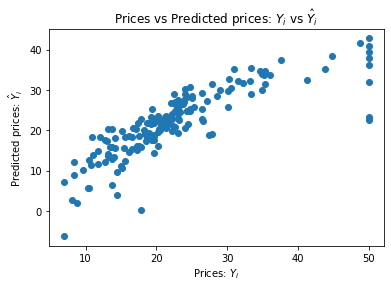

In [0]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)


y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(Y_test, y_pred_from_sklearn)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Comparing numeric values :


In [0]:
sklearn_pred_df = pd.DataFrame(
    {
        'Actual Value' : Y_test, 
     'Predicted Values' : y_pred_from_sklearn
    }
)
sklearn_pred_df.head(10)

,Actual Value,Predicted Values
0,37.6,37.467236
1,27.9,31.391547
2,22.6,27.120196
3,13.8,6.468433
4,35.2,33.629667
5,10.4,5.670680
6,23.9,27.039467
7,29.0,29.927047
8,22.8,26.356613
9,23.2,22.452460



## Functions needed to implement Linear Regression With Gradient Descent :

### - Standardizing Data before plugging it into the Linear regression model. 


In [0]:

X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_test.mean()) /  X_test.std()

In [0]:
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0:no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05                                # Learning rate Decay 
    return w

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

In [0]:
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized,Y_train,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

mean square error:  0.003775811209439526 after 0 th iteration
mean square error:  0.0826725827949328 after 1 th iteration
mean square error:  4.5193392606368205e-05 after 2 th iteration
mean square error:  0.004138636437771344 after 3 th iteration
mean square error:  0.0006857779989617055 after 4 th iteration
mean square error:  0.0010223468075220624 after 5 th iteration
mean square error:  0.0009240258755377416 after 6 th iteration
mean square error:  0.0010168313257835264 after 7 th iteration
mean square error:  0.001108552818120816 after 8 th iteration
mean square error:  0.0012050536323118589 after 9 th iteration
mean square error:  0.0012959134389107741 after 10 th iteration
mean square error:  0.001377881798860908 after 11 th iteration
mean square error:  0.001449848074663109 after 12 th iteration
mean square error:  0.0015118682814598315 after 13 th iteration
mean square error:  0.0015645678061702124 after 14 th iteration
mean square error:  0.0016088206593499487 after 15 th ite

0.006429854125149544

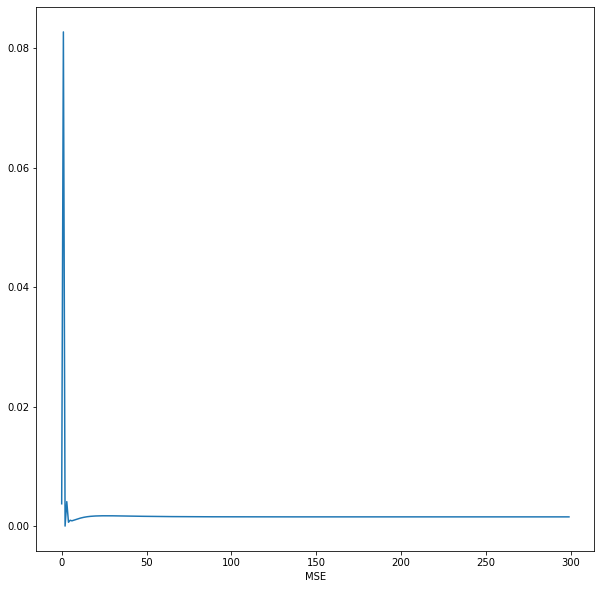

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.plot(range(0,300 ), MSE_points)
plt.xlabel('MSE')
plt.show()
# sns.lineplot(MSE_points)

# ScatterPlot for the predicted values using the custom Linear Regression:

In [0]:
pred_df = pd.DataFrame(
    {
        'Actual Value' : Y_test, 
     'Predicted Values' : Y_pred,
    }
)
pred_df.head(10)

,Actual Value,Predicted Values
0,37.6,36.134541
1,27.9,29.261992
2,22.6,27.077227
3,13.8,6.394572
4,35.2,33.728038
5,10.4,7.454196
6,23.9,27.307610
7,29.0,29.537510
8,22.8,26.986247
9,23.2,21.034343


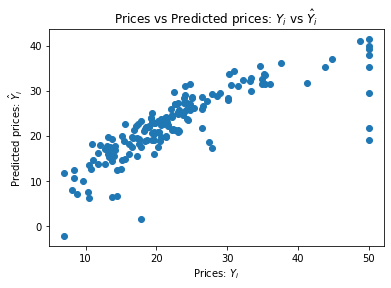

In [0]:
plt.scatter(Y_test, Y_pred)
# plt.plot([min(X_train), max(X_train)], [min(Y_pred), max(Y_pred)], color='red')

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

<H1 align='center'>VS</H1>

# ScatterPlot for the predicted values using the Linear Regression by sklearn:

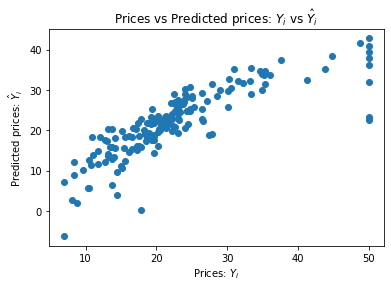

In [0]:
plt.scatter(Y_test, y_pred_from_sklearn)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

MSE_custom_LR_Model = mean_squared_error(Y_test, Y_pred)
MSE_sklearn_LR_Model = mean_squared_error(Y_test, y_pred_from_sklearn)

print(MSE_custom_LR_Model)
print(MSE_sklearn_LR_Model)

31.096027780822244
28.5304587659747


In [0]:
from prettytable import PrettyTable

x = PrettyTable(['Models', 'MSE'])

x.add_row(['Linear Regression (SKLEARN)', MSE_sklearn_LR_Model])
x.add_row(['Linear Regression (From Scratch)', MSE_custom_LR_Model])
print(x)

+----------------------------------+--------------------+
|              Models              |        MSE         |
+----------------------------------+--------------------+
|   Linear Regression (SKLEARN)    |  28.5304587659747  |
| Linear Regression (From Scratch) | 31.096027780822244 |
+----------------------------------+--------------------+


# It can be deduced from the above cells that our custom made Linear Regression in core python code performs almost as good as the Linear Regression model we import from sklearn. 
